"Implementation coding of:  Demystifying Diagnosis: An efficient Deep Learning Technique with Explainable AI to Improve Breast Cancer Detection":

Ahmed Alzahrani, Muhammad Ali Raza, Muhammad Zubair Asghar.

Department of Computer Science, Faculty of Computing and Information Technology, King Abdulaziz University, Jeddah 21589, Saudi Arabia,  
Gomal Research Institute of Computing (GRIC), Faculty of Computing, Gomal University, D.I.Khan(KP), Pakistan.

Import libraries: The first step in preparing a dataset and in training a model is to load libraries. These libraries are required to carry out a specific task.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense,Flatten
from keras.layers import LSTM,BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPool1D

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Dataset uploading from computer
The dataset in "csv" form is uploaded by executing "data = pd.read_csv" code.


In [3]:
data = pd.read_csv('data.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)


Benign 357
Malignanat 212


Dependent and independent variable

In [5]:
x = data.drop(['id', 'diagnosis'], axis='columns')
Y = data['diagnosis']


Feature selection: 
The Extra Tree Classifier feature selection method was employed in this investigation. Extremely Randomised Trees Classifier, also known as Extra Trees Classifier.
Feature selection 
Thirteen independent features are drop by selecting most important features using feature selection technique.

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,Y)


ExtraTreesClassifier()

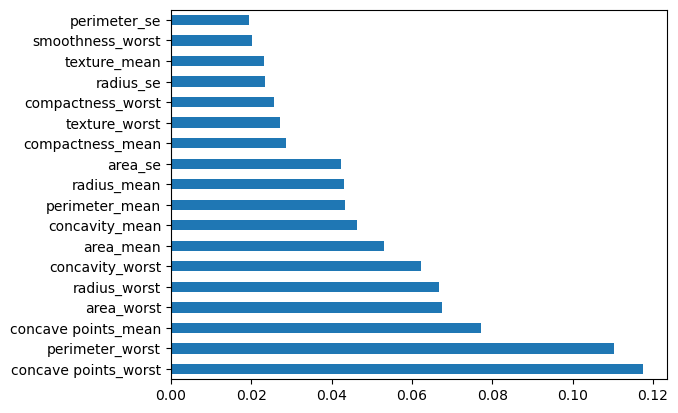

In [8]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(18).plot(kind='barh')
plt.show()

In [9]:
X = data.drop(['id', 'diagnosis','smoothness_mean','symmetry_mean', 'fractal_dimension_mean','texture_se','smoothness_se',
'compactness_se', 'concavity_se', 'concave points_se','symmetry_se','fractal_dimension_se','symmetry_worst', 
               'fractal_dimension_worst'], axis='columns')
y = data['diagnosis']


The underlying dataset unfairly affects both groups due to its extreme imbalance. For a positive test, for Benign, there are 357 instances (62.7%), and for Malignant, there are 212 cases (37.2%). After applying random oversampling, the balanced data set is treated in the same way for both the M:357 and B:357 classes. There are 714 total cases

In [10]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros= RandomOverSampler()
X,y=ros.fit_resample(X,y)
print(Counter(y))


Counter({'M': 357, 'B': 357})


The feature "diagnosis," which belongs to the class of characters, is one of the dataset's characteristics. Using Label Encoder of the scikit learn library, this column is converted into a numeric type

In [11]:

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

Splitting the dataset into the Training set and Test set

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =61)


Standardization:
For many ML and DL models, ensuring that the data is scaled properly is one of the fundamental functions of feature engineering. Standardization scaling technique used

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train1)
X_test = sc.transform(X_test1)


Reshape() is a built-in function that is used to maintain consistency and meet input requirements 

In [14]:
X_train = X_train.reshape(571,18,1)
X_test = X_test.reshape(143, 18, 1)


Proposed BiLSTM-CNN construction:
The proposed DL model, BiLSTM-CNN, was developed using the Keras sequential API. The model is built up layer by layer.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten, Dense, Input

model = Sequential()
# Use Input() for the first layer
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(Bidirectional(LSTM(units=35, activation="relu", return_sequences=True)))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=6, padding='same', activation='relu'))
model.add(Dropout(0.3))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(35, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [17]:
history = model.fit(X_train, y_train, epochs=100,batch_size=32 , validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - accuracy: 0.8334 - loss: 0.5311 - val_accuracy: 0.9161 - val_loss: 0.1753
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9616 - loss: 0.1272 - val_accuracy: 0.9301 - val_loss: 0.1320
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9463 - loss: 0.1383 - val_accuracy: 0.9650 - val_loss: 0.1145
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9744 - loss: 0.0849 - val_accuracy: 0.9790 - val_loss: 0.1075
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9541 - loss: 0.0969 - val_accuracy: 0.9650 - val_loss: 0.1183
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9581 - loss: 0.1156 - val_accuracy: 0.9510 - val_loss: 0.1186
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9568 - loss: 0.1141 - val_accuracy: 0.9790 - val_loss: 0.0931
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9594 - loss: 0.1166 - val_accuracy: 

Model Evaluation: The BiLSTM-CNN model is evaluated through “model.evaluate()” function 

In [18]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Test loss: 0.02272673137485981
Test accuracy: 0.9930070042610168


In [19]:
_,test_acc = model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9920 - loss: 0.0253


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline


In [21]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)



5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 375ms/step


In [22]:
y_pred.shape

(143, 1)

Prediction: For projection and predication the dataset “Prediction()” function

In [23]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.993006993006993


confusion matrix: The confusion matrix is obtained using the "confusion_matrix()" function 

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[61,  1],
       [ 0, 81]], dtype=int64)

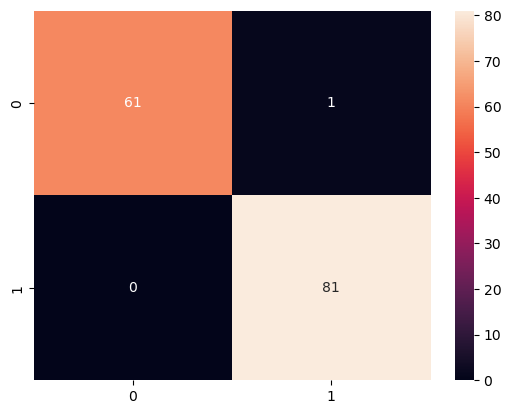

In [25]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

Metrics evaluation: The evaluation of suggested BiLSTM-CNN model in terms of accuracy, precision, recall and  f1-score.

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.99      1.00      0.99        81

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



The plot accuracy versus epochs shows the capability of the model to correctly classify over a training set and provide information about Model Convergence and the ability for overfitting or underfitting. Also, loss versus epochs plot gives insight into model optimization and model capability to reduce mistakes in prediction.

In [27]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [28]:
history.history

{'accuracy': [0.8949211835861206,
  0.9562171697616577,
  0.9579684734344482,
  0.9614710807800293,
  0.9457092881202698,
  0.9562171697616577,
  0.9597197771072388,
  0.9632224440574646,
  0.9667250514030457,
  0.9632224440574646,
  0.9597197771072388,
  0.9632224440574646,
  0.9649737477302551,
  0.9649737477302551,
  0.9632224440574646,
  0.9649737477302551,
  0.9667250514030457,
  0.9684763550758362,
  0.9684763550758362,
  0.9649737477302551,
  0.9684763550758362,
  0.9702276587486267,
  0.9754816293716431,
  0.9754816293716431,
  0.9737303256988525,
  0.9737303256988525,
  0.9737303256988525,
  0.9789842367172241,
  0.9719789624214172,
  0.9719789624214172,
  0.9789842367172241,
  0.9824868440628052,
  0.9719789624214172,
  0.9807355403900146,
  0.9807355403900146,
  0.9807355403900146,
  0.9772329330444336,
  0.9877408146858215,
  0.9842382073402405,
  0.9737303256988525,
  0.9789842367172241,
  0.9842382073402405,
  0.9754816293716431,
  0.9789842367172241,
  0.9824868440628052

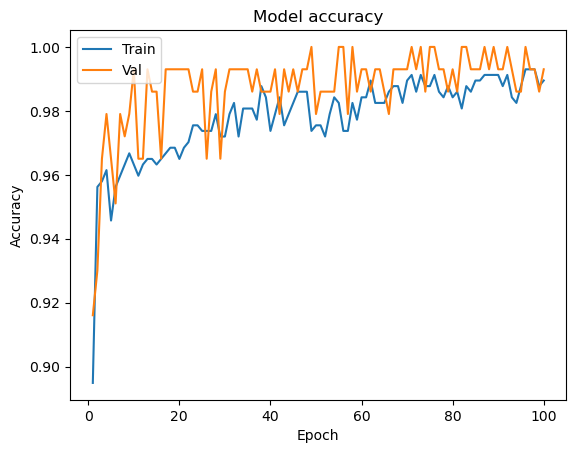

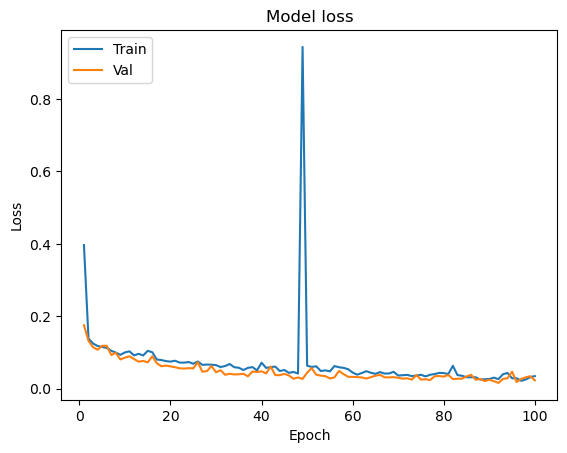

In [29]:
epochs=100
plot_learningCurve(history, epochs)

Applying Explainable AI using Shapley Additive Explanations (SHAP)

In [30]:
import shap


# Reshape X_train and X_test
X_train_reshape = X_train.reshape(571, 18)  # Reshape to 2 dimensions
X_test_reshape = X_test.reshape(143, 18)  # Reshape to 2 dimensions

# Create a SHAP explainer object
explainer = shap.Explainer(model, X_train_reshape)

# Calculate SHAP values for a subset of the data (e.g., X_test_reshape)
shap_values = explainer.shap_values(X_test_reshape)

PermutationExplainer explainer: 144it [08:43,  3.66s/it]                         


Summary Plot using SHAP Explanation

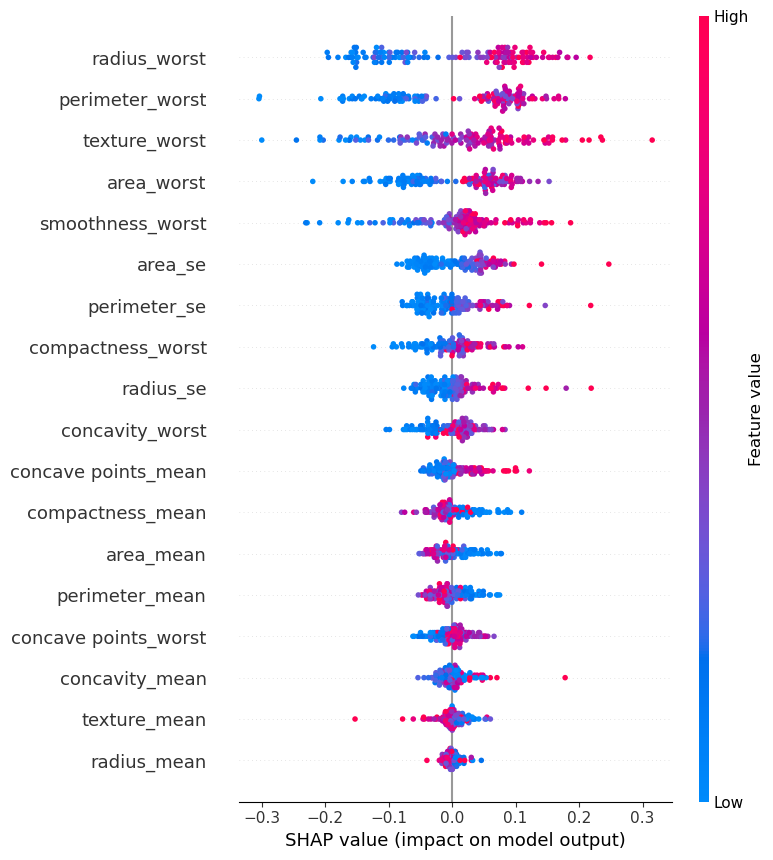

In [31]:
# Plot the SHAP values
shap.summary_plot(shap_values, X_test1)

Generated Local Explanation of signal instance using waterfall plot

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


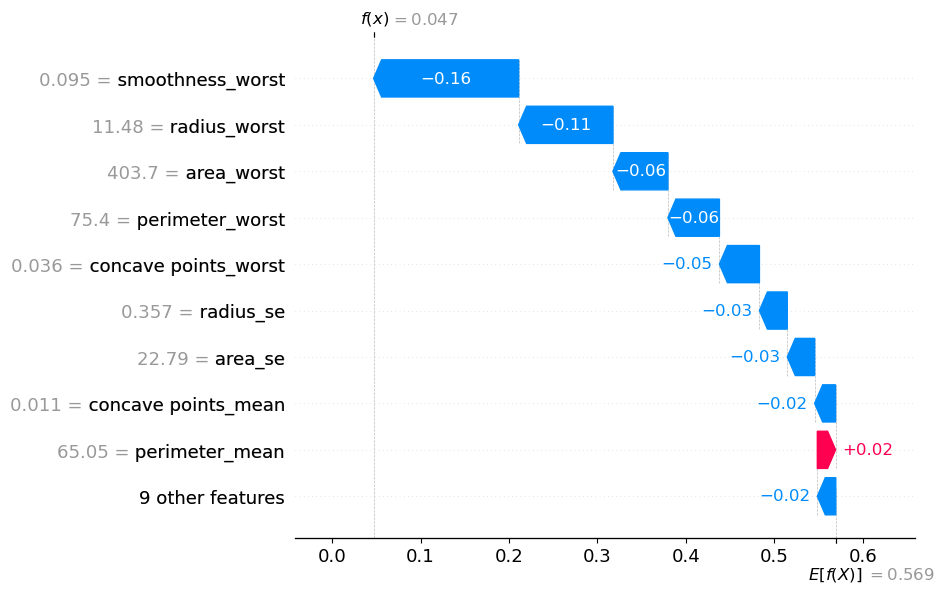

In [32]:
# Select a specific instance from the dataset (e.g., the first instance)
instance_index = 1  # Change this index to visualize a different instance
shap_values_instance = shap_values[instance_index]

# Calculate the baseline value (e.g., using the mean of model predictions)
baseline_value = np.mean(model.predict(X_test))

# Create an Explanation object for the selected instance
shap_values_explanation = shap.Explanation(values=shap_values_instance, base_values=baseline_value, data=X_test1.iloc[instance_index])

# Create a waterfall plot using the SHAP values of the selected instance
shap.plots.waterfall(shap_values_explanation)

Generated Local Explanation of signal instance using Force plot

In [33]:
shap.initjs()
shap.force_plot(shap_values_explanation,
shap_values[instance_index],
X_test1.iloc[instance_index])

In [34]:
instance_index = 100  # Change this index to visualize a different instance
shap_values_instance = shap_values[instance_index]
baseline_value = np.mean(model.predict(X_test))

# Create an Explanation object for the selected instance
shap_values_explanation = shap.Explanation(values=shap_values_instance, base_values=baseline_value, data=X_test1.iloc[instance_index])

shap.initjs()
shap.force_plot(shap_values_explanation,
shap_values[instance_index],
X_test1.iloc[instance_index])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


SHAP plot generated Gobal Explanation

In [35]:
# Plot the SHAP values
shap.force_plot(baseline_value, shap_values, X_test1)